In [86]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 20
max_generation = 50

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [88]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000020, 1 / 31 ...
reading generation_0000021, 2 / 31 ...
reading generation_0000022, 3 / 31 ...
reading generation_0000023, 4 / 31 ...
reading generation_0000024, 5 / 31 ...
reading generation_0000025, 6 / 31 ...
reading generation_0000026, 7 / 31 ...
reading generation_0000027, 8 / 31 ...
reading generation_0000028, 9 / 31 ...
reading generation_0000029, 10 / 31 ...
reading generation_0000030, 11 / 31 ...
reading generation_0000031, 12 / 31 ...
reading generation_0000032, 13 / 31 ...
reading generation_0000033, 14 / 31 ...
reading generation_0000034, 15 / 31 ...
reading generation_0000035, 16 / 31 ...
reading generation_0000036, 17 / 31 ...
reading generation_0000037, 18 / 31 ...
reading generation_0000038, 19 / 31 ...
reading generation_0000039, 20 / 31 ...
reading generation_0000040, 21 / 31 ...
reading generation_0000041, 22 / 31 ...
reading generation_0000042, 23 / 31 ...
reading generation_0000043, 24 / 31 ...
reading generation_0000044, 25 / 31 ...
reading g

In [89]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
20540,40,fish_241218_01_21_57.586095,51.6,False
13158,33,fish_241217_19_45_40.937451,51.6,False
16683,36,fish_241217_22_12_17.358215,52.8,False
4227,24,fish_241217_11_30_10.547420,53.7,False
22964,42,fish_241218_02_56_54.677876,55.4,False
...,...,...,...,...
21026,41,fish_241218_00_36_11.202777,3113.7,True
27082,47,fish_241218_06_03_24.548066,3130.5,True
30759,50,fish_241218_09_21_33.948396,3303.8,False
19238,39,fish_241218_00_36_11.236944,3314.2,False


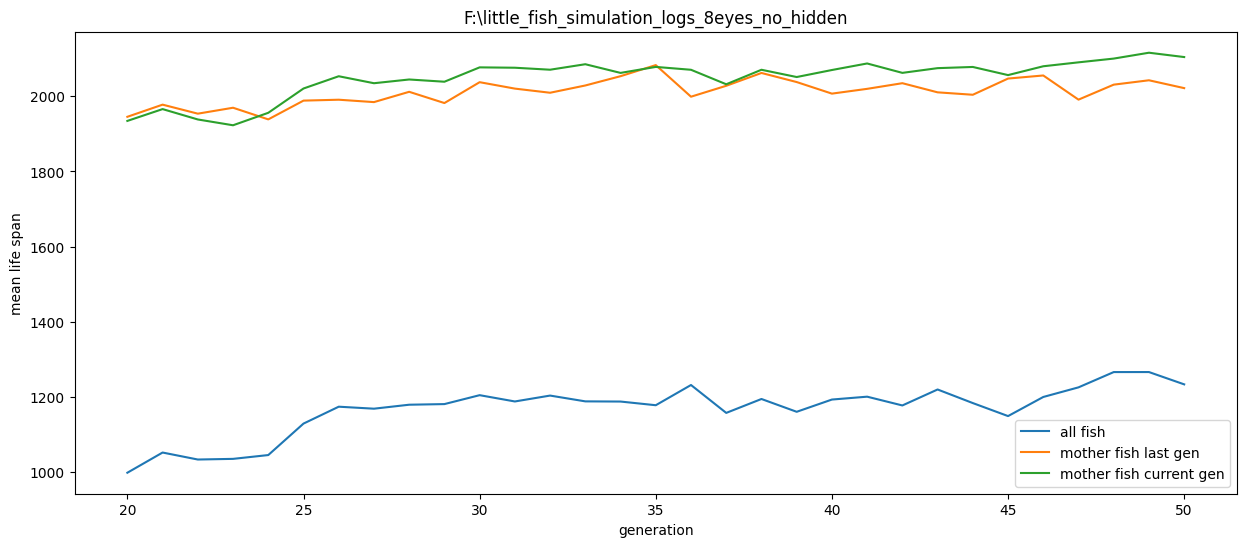

In [90]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 4000.0)

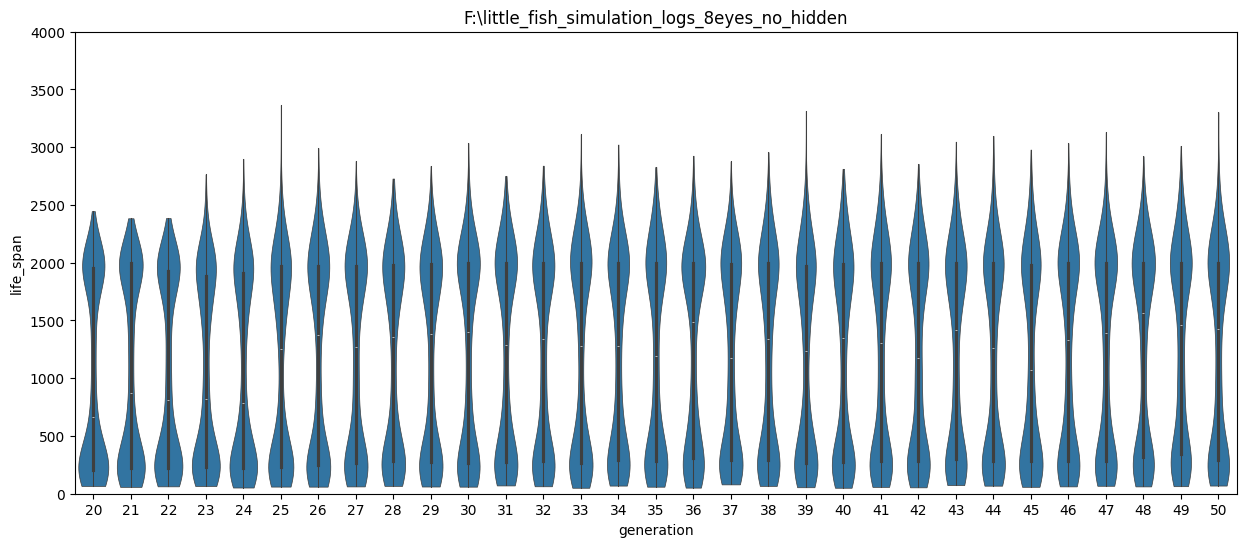

In [91]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 4000])

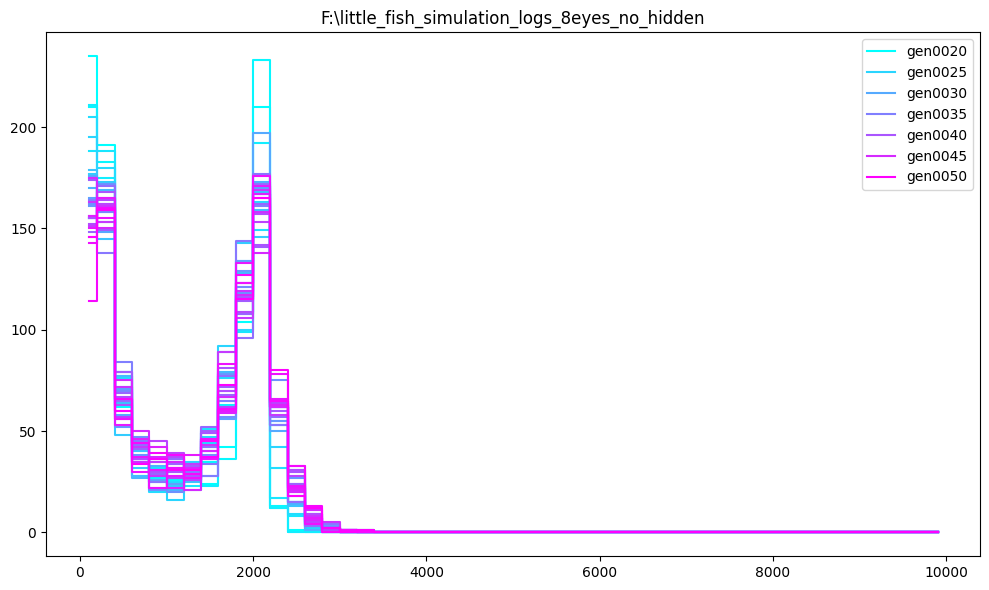

In [92]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()